In [2]:
# Create some tagged images

#using the datagen framework this willl make x images

FILEPATH = "./data"

from ClassFiles.GeneratedDataset import generate_data_lunglike_tagged as gen

gen(10,FILEPATH)

100%|██████████| 10/10 [00:00<00:00, 16.56it/s]


In [2]:
cd /Users/jamesmason/Documents/GitHub/Segmentation

/Users/jamesmason/Documents/GitHub/Segmentation


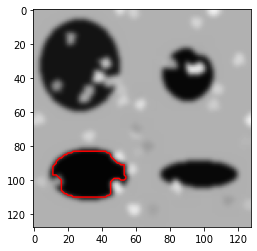

In [9]:
#load image
from PIL import Image
import numpy as np

FILEPATH = "./data/image_"+str(2)

im   = Image.open(FILEPATH+"/dirty.png")
tag  = np.load(FILEPATH+"/tag.npy")


#run ChanVese
from ClassFiles.ChanVese_Selective import ChanVeseSelect
cvim = ChanVeseSelect(im,tag)

cvim.run(500,gamma=1,lmb=2,theta=0.1)

#im2 = Image.fromarray(cvim.u*255)
#im2.show()


#Load the NN
import Neural_Networks_lunglike.ClassFiles.networks as net
import torch

NN = net.ConvNet1(1, 128, 128)
NN.load_state_dict(
    torch.load("./Neural_Networks_lunglike/ConvNet1_trained", map_location=torch.device("cpu") ))


import ClassFiles.DeepSegmentationSelective as ds

#run the NN
geo     = np.copy(cvim.geo)
initial = np.copy(cvim.u)

dsim = ds.DeepSegmentation(im,NN,geo,initial)
#dsim.run(100)

#Test the segmentations
#dsim.show_segemntation()
cvim.show_segmentation()